# About: オンプレミス環境の場合のマシン設定

オンプレミス環境でCoursewareHubを構築したい場合、以下の作業を行う必要があります。

- マシンの準備
- SSH接続の準備
- Ansible Inventoryの準備

# マシンの準備

CoursewareHubの構築はJupyter Notebookを用いて行います。そのため、各マシンは以下のように [OperationHub](https://github.com/NII-cloud-operation/OperationHub)から各マシンに疎通可能となっている必要があります。(このNotebookは、OperationHubで開いている前提とします。)

また、講師・受講者がサービスにアクセスするため、うち1台のマシンには外部から(講師・受講者から)接続可能なIPアドレスが指定されている必要があります。

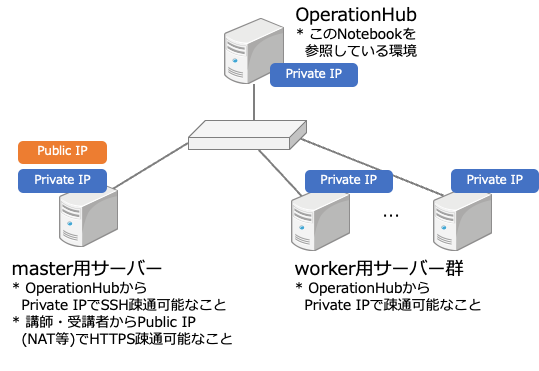

# SSH接続の準備

OperationHubからSSH経由でマシンに疎通できるようになっている必要があります。

SSHは後述するようにAnsibleで使用します。このNotebookでは、マシンに対して**鍵認証**でSSH接続できるよう設定してある(このOperationHub環境にSSH用の秘密鍵がすでに作成されている)前提とします。


# Ansible Inventoryの準備



Ansibleを通じてマシンにSSH接続できるようにするため、Ansible Inventoryを記述してください。
このNotebookでは、Ansible Inventoryは `./hosts` という名前のファイルを作成することを前提としています。

ファイルは New - Text File で作成することができます。

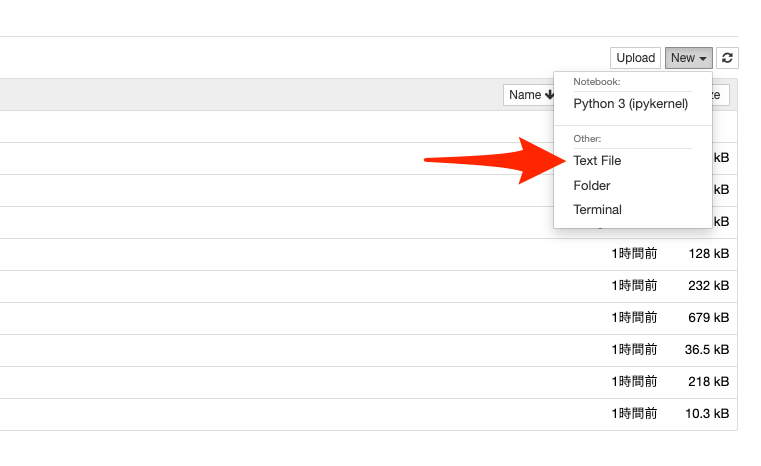

記述例は以下のようになります。

```
[cwhtest0001]
10.1.1.1 public_ip=35.79.116.1 ansible_ssh_user=centos ansible_ssh_private_key_file=~/.ssh/ansible_id_rsa
10.1.1.2 ansible_ssh_user=centos ansible_ssh_private_key_file=~/.ssh/ansible_id_rsa
10.1.1.3 ansible_ssh_user=centos ansible_ssh_private_key_file=~/.ssh/ansible_id_rsa
```

Ansible Inventoryの冒頭には以下を記載する必要があります。

`[グループ名]` 同一のAnsible Inventory中でユニークなグループ名を指定する必要があります。

その後、マシンを1行ごとに列挙します。

`(OperationHubから疎通可能なIPアドレス) (Ansible Inventoryパラメータ)`

Ansible Inventoryパラメータには以下を指定できます。[Ansibleのドキュメント](https://docs.ansible.com/ansible/latest/user_guide/intro_inventory.html#connecting-to-hosts-behavioral-inventory-parameters) で列挙された項目も指定可能です。

- `ansible_ssh_user` ... AnsibleでのSSH接続に使用するユーザー名。sudo可能である必要があります。
- `ansible_ssh_private_key_file` ... AnsibleでのSSH接続に使用する秘密鍵のパス。
- `public_ip` ... (1台だけ必要) 外部から(講師・受講者から)接続可能なIPアドレス

Ansible Inventoryファイルを記述したら、以下を実行して動作を確認します。エラーとなる場合はAnsible Inventoryが適切なパスに作成されていることと、グループ名が正しいことを確認してください。

In [ ]:
import os

inventory_path = './hosts' # Ansible Inventoryのパス(Notebookに対する相対パス)
assert os.path.exists(inventory_path)
target_group = 'cwhtest0001' # グループ名

!ansible -m ping -i {inventory_path} {target_group}

# 以上が実施できたら...

引き続き、 [D02_CoursewareHubインベントリの準備](D02_CoursewareHubインベントリの準備.ipynb) Notebookを実施してください。